In [ ]:
import pandas_datareader.data as web
import datetime
import numpy as np

import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
start = datetime.datetime(2024,12,16)
end= datetime.datetime(2024,12,20)

In [ ]:
google=yf.download("GOOGL",period="5d",interval="5m")
google.info()
google.describe()

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 363 entries, 2024-12-17 14:30:00+00:00 to 2024-12-23 18:40:00+00:00
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, GOOGL)  363 non-null    float64
 1   (Close, GOOGL)      363 non-null    float64
 2   (High, GOOGL)       363 non-null    float64
 3   (Low, GOOGL)        363 non-null    float64
 4   (Open, GOOGL)       363 non-null    float64
 5   (Volume, GOOGL)     363 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 19.9 KB


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
count,363.000000,363.000000,363.000000,363.000000,363.000000,3.630000e+02
mean,193.087099,193.087099,193.372499,192.821102,193.100422,3.289510e+05
std,2.928702,2.928702,2.926402,2.949908,2.938485,4.795805e+05
min,185.660095,185.660095,186.085007,185.220001,185.720001,5.966300e+04
25%,190.862503,190.862503,191.165001,190.480003,190.880005,1.529320e+05
50%,192.360001,192.360001,192.550003,192.110001,192.399994,2.175910e+05
75%,195.567253,195.567253,195.750000,195.431396,195.568855,3.268765e+05
max,200.949997,200.949997,201.419006,200.380005,200.899994,7.021479e+06


In [ ]:
google.tail(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Datetime,,,,,,
2024-12-20 20:10:00+00:00,192.490005,192.490005,192.520004,192.080002,192.270004,143322
2024-12-20 20:15:00+00:00,192.434998,192.434998,192.610001,192.410004,192.490005,154102
2024-12-20 20:20:00+00:00,192.220001,192.220001,192.509995,192.205002,192.429993,194975
2024-12-20 20:25:00+00:00,192.255005,192.255005,192.460007,192.193405,192.205002,175243
2024-12-20 20:30:00+00:00,191.574997,191.574997,192.320007,191.479996,192.259995,318211
2024-12-20 20:35:00+00:00,192.000000,192.000000,192.199997,191.490005,191.574997,193594
2024-12-20 20:40:00+00:00,191.875000,191.875000,192.270004,191.600006,192.009995,153399
2024-12-20 20:45:00+00:00,192.039993,192.039993,192.320007,191.869995,191.880005,246994


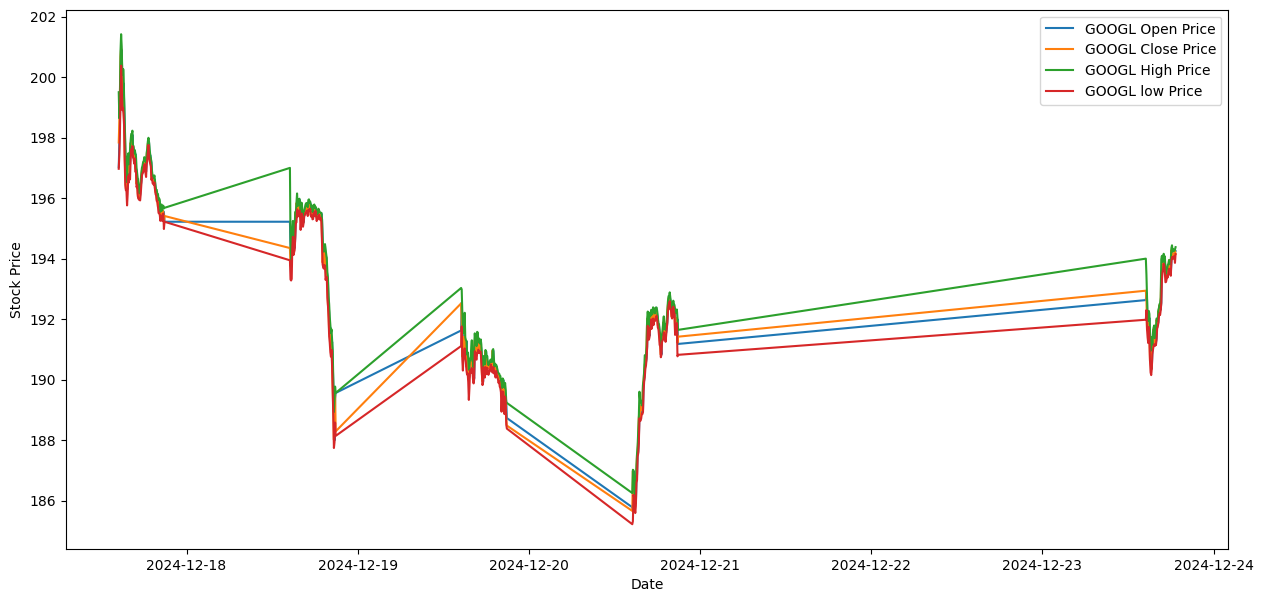

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,7))
plt.plot(google['Open'],label='GOOGL Open Price')
plt.plot(google['Close'],label='GOOGL Close Price')
plt.plot(google['High'],label='GOOGL High Price')
plt.plot(google['Low'],label='GOOGL low Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Volume Traded by GOOGL')

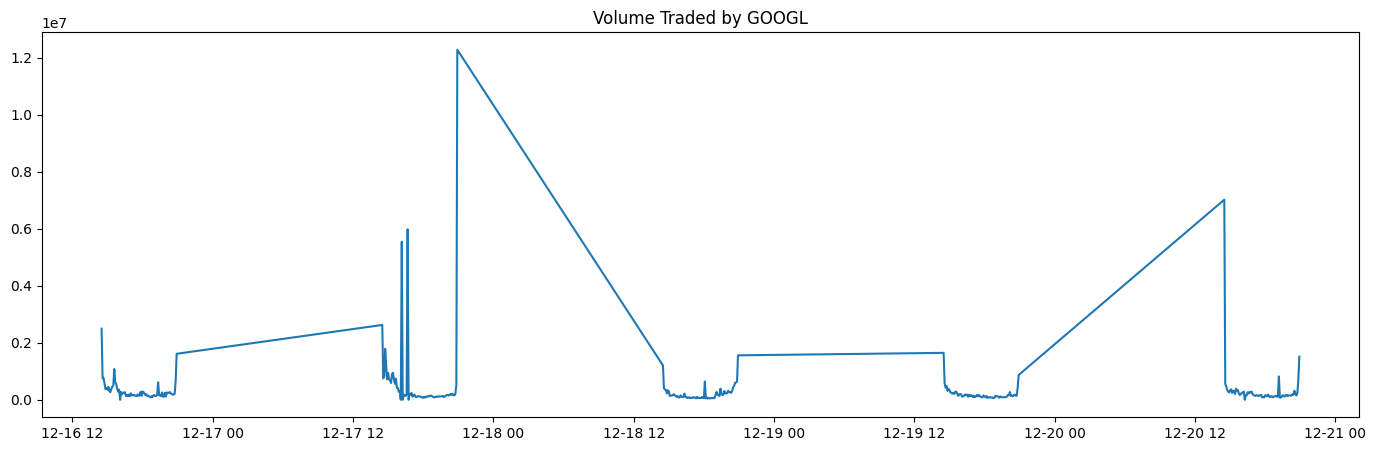

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(google['Volume'])
plt.title('Volume Traded by GOOGL')

In [ ]:
df= google

In [ ]:
df['vp']=((df['High']+df['Low']+df['Close'])/3)*df['Volume']


In [ ]:
df[['Volume','vp']]

Price,Volume,vp
Ticker,GOOGL,
Datetime,,
2024-12-17 14:30:00+00:00,2624986,5.200185e+08
2024-12-17 14:35:00+00:00,749835,1.486198e+08
2024-12-17 14:40:00+00:00,805337,1.602809e+08
2024-12-17 14:45:00+00:00,1790497,3.586574e+08
2024-12-17 14:50:00+00:00,1193653,2.398244e+08
...,...,...
2024-12-23 18:20:00+00:00,278456,5.405573e+07
2024-12-23 18:25:00+00:00,81605,1.584321e+07


In [ ]:
df['cum_vp']=df['vp'].cumsum()
df['cum_vol']=df['Volume'].cumsum()

In [ ]:
df['vwap']=(df['cum_vp']/df['cum_vol'])

In [ ]:
df['vwap']

,vwap
Datetime,
2024-12-17 14:30:00+00:00,198.103333
2024-12-17 14:35:00+00:00,198.125550
2024-12-17 14:40:00+00:00,198.298515
2024-12-17 14:45:00+00:00,198.902224
2024-12-17 14:50:00+00:00,199.237798
...,...
2024-12-23 18:20:00+00:00,192.840185
2024-12-23 18:25:00+00:00,192.841081
2024-12-23 18:30:00+00:00,192.845328


In [ ]:
df['tp']=df[['High','Low','Close']].mean(axis=1)

In [ ]:
df['tp']

,tp
Datetime,
2024-12-17 14:30:00+00:00,198.103333
2024-12-17 14:35:00+00:00,198.203328
2024-12-17 14:40:00+00:00,199.023336
2024-12-17 14:45:00+00:00,200.311666
2024-12-17 14:50:00+00:00,200.916336
...,...
2024-12-23 18:20:00+00:00,194.126663
2024-12-23 18:25:00+00:00,194.145101
2024-12-23 18:30:00+00:00,194.186167


In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

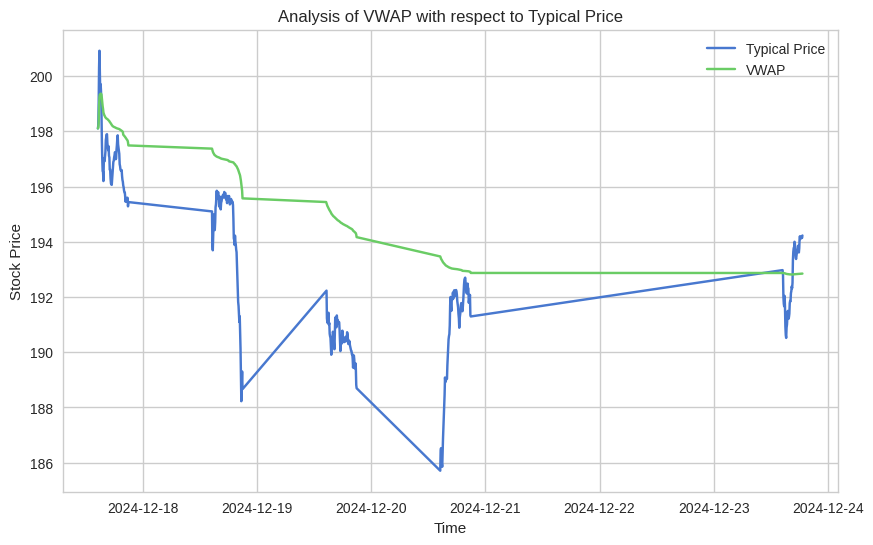

In [ ]:

plt.figure(figsize=(10,6))
plt.plot(df['tp'],label='Typical Price')
plt.plot(df['vwap'],label='VWAP')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Analysis of VWAP with respect to Typical Price')
plt.style.use('seaborn-v0_8-whitegrid')
plt.legend()
plt.show()


In [ ]:
# stock price trended up at start of week , thee price was abve vwap for 2 days
# price consolidated on 17 and remanied on 18, there was no strong nuy sell pressue
# price took a dip on 18 an dfall under vwap
#
#

In [ ]:
window_size=20
windows=df['Close'].rolling(20)
moving_average=windows.mean()
final_list=moving_average[(window_size-1):]
df['SMA20']=final_list

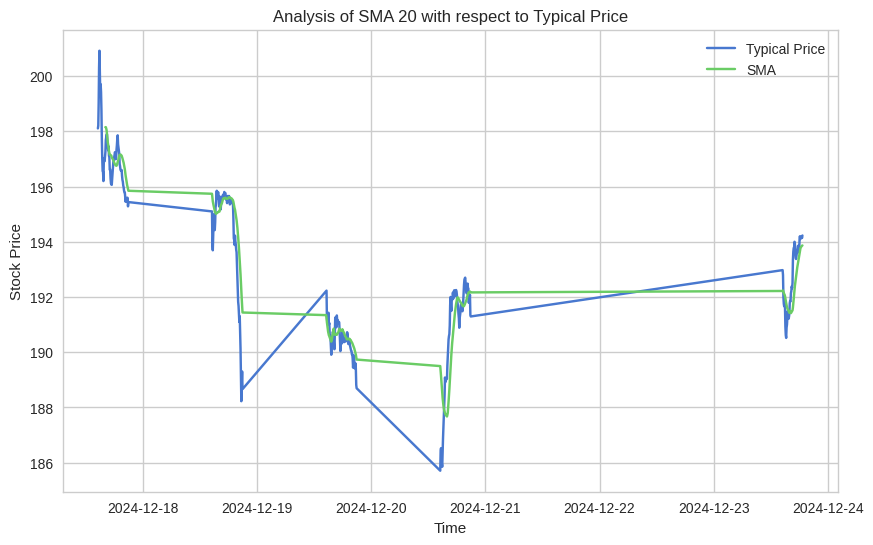

In [ ]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-v0_8-whitegrid')
plt.plot(df['tp'],label='Typical Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Analysis of SMA 20 with respect to Typical Price')
plt.plot(df['SMA20'],label='SMA')
plt.legend()
plt.show()


In [ ]:
window_size=50
windows=df['Close'].rolling(50)
moving_average=windows.mean()
final_list=moving_average[(window_size-1):]
df['SMA50']=final_list

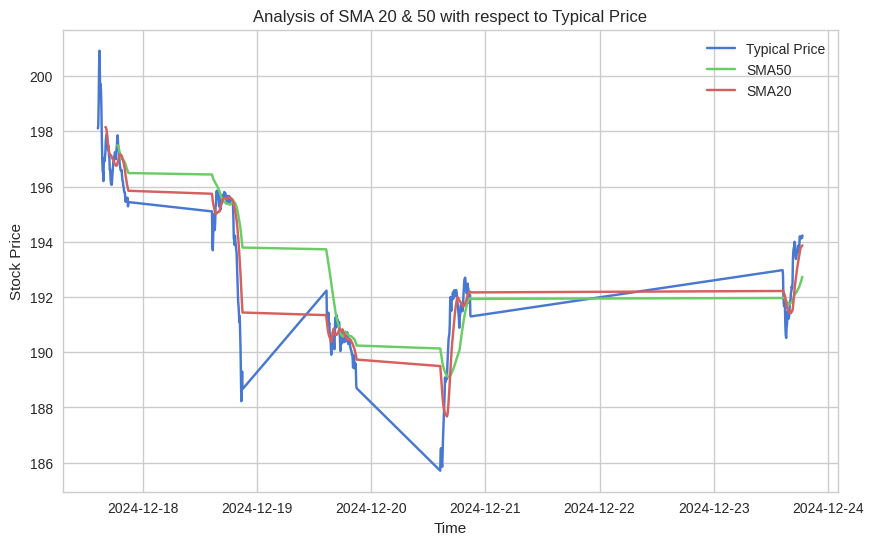

In [ ]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-v0_8-whitegrid')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Analysis of SMA 20 & 50 with respect to Typical Price')
plt.plot(df['tp'],label='Typical Price')
plt.plot(df['SMA50'],label='SMA50')
plt.plot(df['SMA20'],label='SMA20')
plt.legend()
plt.show()


In [ ]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume,vp,cum_vp,cum_vol,vwap,tp,SMA20,SMA50,STD
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,,,,,,,,
count,390.000000,390.000000,390.000000,390.000000,390.000000,3.900000e+02,3.900000e+02,3.900000e+02,3.900000e+02,390.000000,390.000000,371.000000,341.000000,3.900000e+02
mean,193.948064,193.948064,194.228812,193.668611,193.955655,3.273983e+05,6.356200e+07,1.406434e+10,7.187227e+07,195.910658,193.948495,193.980846,193.947339,3.276929e+00
std,3.280944,3.280944,3.266330,3.300684,3.280773,8.531886e+05,1.658364e+08,7.221551e+09,3.714592e+07,1.065057,3.276929,3.243420,3.181489,1.912037e-14
min,185.660095,185.660095,186.085007,185.220001,185.720001,0.000000e+00,0.000000e+00,4.852155e+08,2.493314e+06,194.142702,185.710032,187.672558,189.111331,3.276929e+00
25%,190.996254,190.996254,191.314999,190.752800,191.053753,1.129538e+05,2.165111e+07,8.210040e+09,4.161403e+07,195.116458,191.063433,190.754272,190.645719,3.276929e+00
50%,194.701202,194.701202,195.090004,194.165001,194.679947,1.592115e+05,3.058505e+07,1.537370e+10,7.813606e+07,195.931626,194.655401,195.089306,195.217288,3.276929e+00
75%,196.899998,196.899998,197.197498,196.634998,196.913750,2.692138e+05,5.193918e+07,1.949844e+10,9.970163e+07,196.773526,196.925001,197.026615,197.014301,3.276929e+00
max,200.949997,200.949997,201.419006,200.380005,200.899994,1.228044e+07,2.400048e+09,2.478918e+10,1.276854e+08,197.343135,200.916336,198.511873,198.286307,3.276929e+00


In [ ]:
import pandas as pd
df['STD']=df['tp'].rolling(20).std()

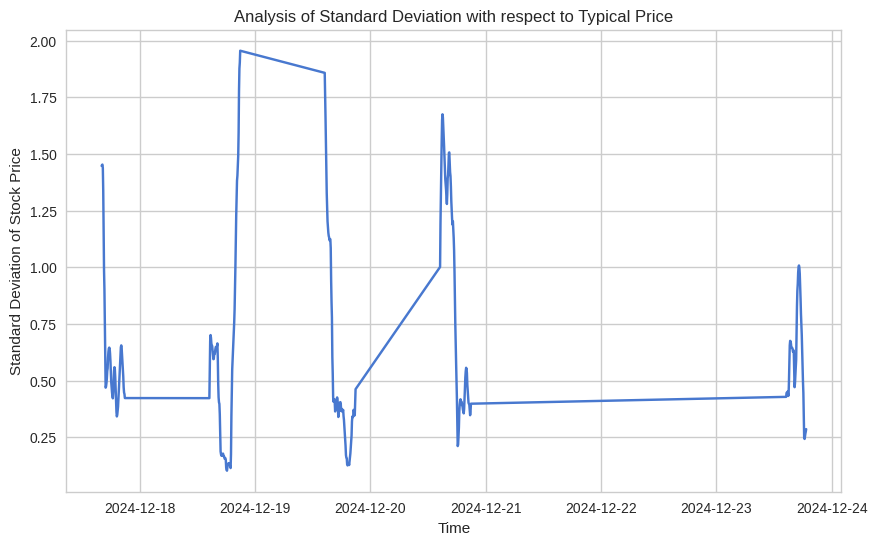

In [ ]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-v0_8-whitegrid')
plt.xlabel('Time')
plt.ylabel('Standard Deviation of Stock Price')
plt.title('Analysis of Standard Deviation with respect to Typical Price')
plt.plot(df['STD'])

In [ ]:
std=df['tp'].std()
print("The Standard Deviation of Typical Price is:",std)
Skew=df['tp'].skew()
print("The Skewness of Typical Price is:",Skew)


The Standard Deviation of Typical Price is: 2.9292585878867197
The Skewness of Typical Price is: 0.0966557484101214


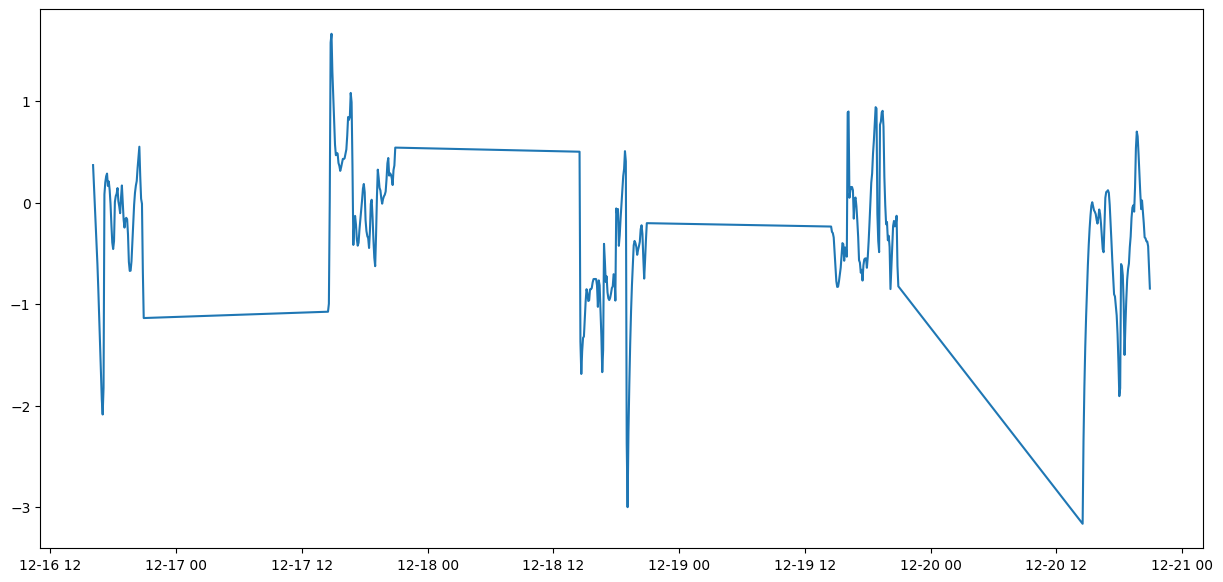

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df['Skew'])